# Titanic Shipreck
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
so the objective of this task is to conduct a comprehensive analysis on the dataset and provide a report with respect to factor to contributes to a passenger surviving or not

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('titan_accident_without_index.csv')
df.shape

(1309, 13)

In [78]:
df.head(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.tail(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [18]:
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,369.478992,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,248.767105,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,163.000000,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,327.000000,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,563.000000,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,890.000000,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [38]:
#number of null values available or where there is null value
df.isnull().sum()

Unnamed: 0        0
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [20]:
#to check the sum of unique number in each column
df.nunique()

Unnamed: 0      891
PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [21]:
#to check where its survived and not survived
((df['Survived'] !=0) & (df['Survived'] !=1))

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: Survived, Length: 1309, dtype: bool

In [22]:
#to check where the condition is true or false in the variable above, assign the variable to x

x=((df['Survived'] !=0) & (df['Survived'] !=1))
df[x]

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# EXPLORATORY DATA ANALYSIS

# 1. PASSENGER'S DEMOGRAPHICS

In [4]:
survival_by_gender = df['Sex'].value_counts()
survival_by_gender

male      843
female    466
Name: Sex, dtype: int64

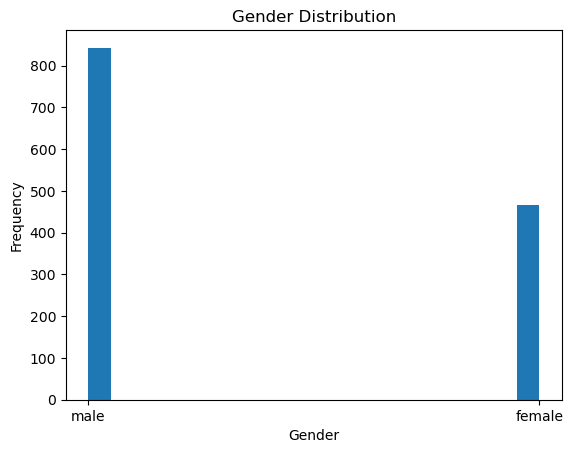

In [6]:
# What is the distribution of passengers based on gender?
df['Sex'].hist(bins=20, grid = False)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Frequency")

In [ ]:
# There were 843 males and 466 females on the ship

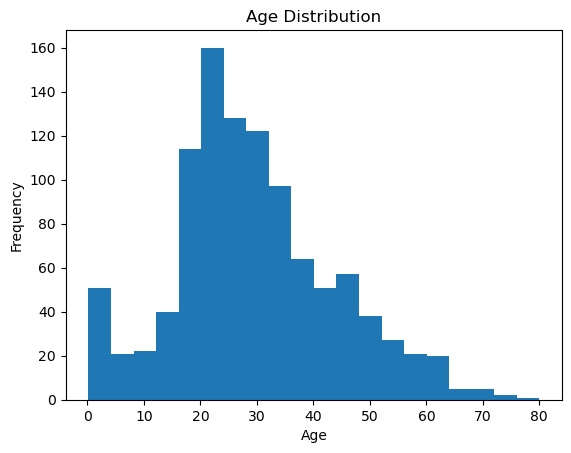

In [7]:
#  passengers that belongs to different age groups?

df['Age'].hist(bins=20, grid = False)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency");

In [10]:
# What are the most common titles in passengers' names?
# Name analysis

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_survival_correlation = df.groupby('Title')['Survived'].mean()
title_survival_correlation

Title
Capt        0.000000
Col         0.250000
Countess    1.000000
Don         0.000000
Dona        1.000000
Dr          0.375000
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.377049
Miss        0.788462
Mlle        1.000000
Mme         1.000000
Mr          0.107001
Mrs         0.868020
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [ ]:
#The most common titles in passengers' names are; Countess, Dona, Lady, Mlle, Mme, Ms and Sir. 

In [13]:
 df['Age'].isnull().sum()

263

# 2. SURVIVAL ANALYSIS

In [23]:
### 1. Survival Rate:
#### Overall Survival Rate:
overall_survival_rate = df['Survived'].mean() * 100

In [24]:
print(f"the overall survival rate is: {overall_survival_rate:.2f}%")

the overall survival rate is: 37.74%


In [25]:
##number of those that survived and those that didnt survived... survival rste
df.Survived.value_counts()

0    815
1    494
Name: Survived, dtype: int64

In [113]:
#### Survival Rate by Gender:

survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100
survival_by_gender

Sex
female    82.618026
male      12.930012
Name: Survived, dtype: float64

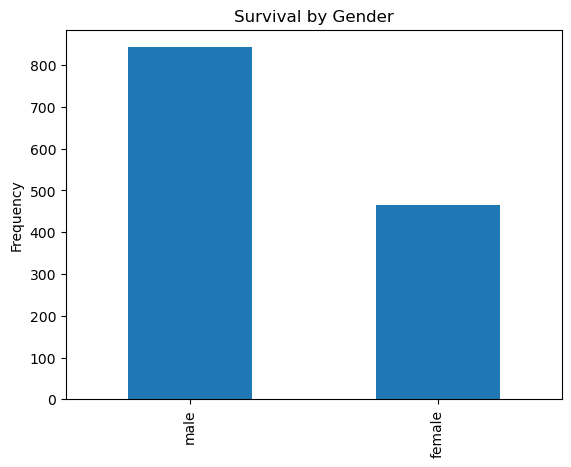

In [15]:
# Chart of those that survived with respect to gender

survival_by_gender.plot(kind='bar', 
                        title='Survival by Gender', 
                        ylabel='Frequency', grid=False);

<Axes: title={'center': 'survival rate by gender'}, ylabel='Sex'>

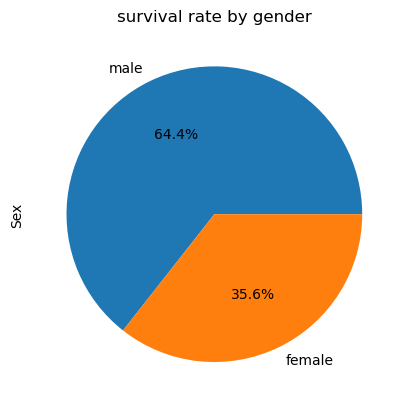

In [16]:
#PIE CHART REPRESENTATION
survival_by_gender.plot(kind = 'pie', autopct= '%1.1f%%', title='survival rate by gender')


In [82]:
#### Survival Rate by Class:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
survival_by_class

Pclass
1    57.585139
2    42.238267
3    26.939351
Name: Survived, dtype: float64

In [17]:
# Survival by Age

survival_by_age = df.groupby('Age')['Survived'].mean() * 100
survival_by_age

Age
0.17     100.000000
0.33       0.000000
0.42     100.000000
0.67     100.000000
0.75      66.666667
            ...    
70.50      0.000000
71.00      0.000000
74.00      0.000000
76.00    100.000000
80.00    100.000000
Name: Survived, Length: 98, dtype: float64

In [18]:
# How does the Survival Rate differ with classes (1st, 2nd, and 3rd)?

# Class of people that survived the ship wreck
df[df["Survived"] ==1]["Pclass"].value_counts()

3    191
1    186
2    117
Name: Pclass, dtype: int64

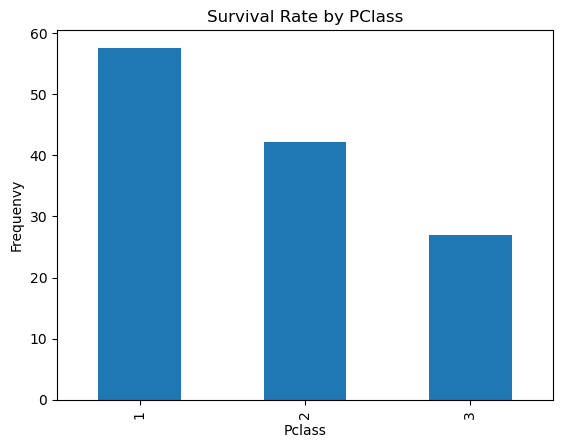

In [20]:
survival_by_class.plot(kind = 'bar', ylabel='Frequenvy')
plt.title("Survival Rate by PClass");

In [19]:
# Percentage of people that survived with respect to each class
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
survival_by_class

Pclass
1    57.585139
2    42.238267
3    26.939351
Name: Survived, dtype: float64

# 3. Age Distribution:

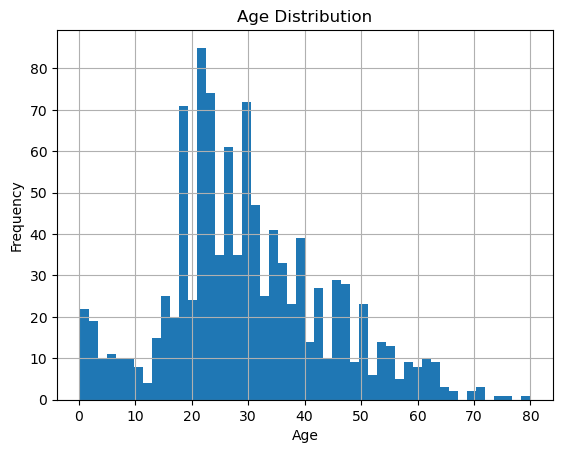

In [84]:

#### Distribution of Ages:
df['Age'].hist(bins=50, grid = True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency");

In [85]:
x = [1,2,3,4,5]
y = [0,9,8,7,6,]
for i in zip(y,x):
    print(i)

(0, 1)
(9, 2)
(8, 3)
(7, 4)
(6, 5)


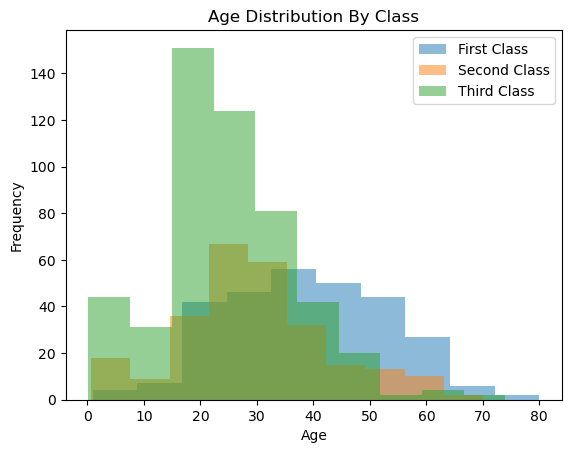

In [112]:
# Grouping data by class and plotting
class_labels = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'}
for class_val, data in df.groupby('Pclass')['Age']:
    plt.hist(data, alpha=.5, label=class_labels[class_val])

plt.title("Age Distribution By Class")
plt.xlabel('Age')
plt.ylabel("Frequency")
plt.legend()
plt.show()


# 4. Fare Distribution:

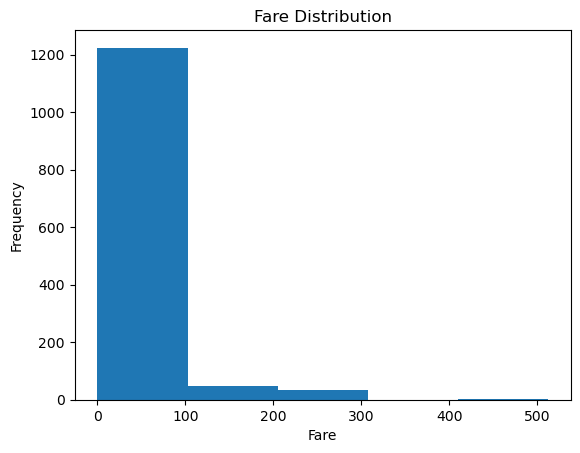

In [22]:

#### Distribution of Fares by bar chart
df['Fare'].hist(bins=5, grid = False);
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency");
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency");


In [ ]:
# Fares of passengers range from 0 to 512 naira with 0 to 100 naira having the highest frequency.

In [23]:
# Distribution of fares paid by passengers

df['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [ ]:
# What is the distribution of Fares paid by passengers across different classes?
# Grouping by class


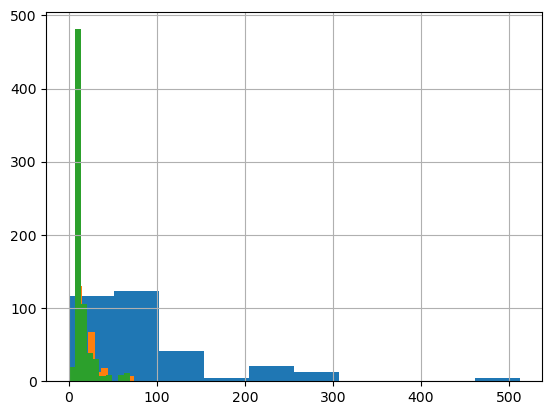

In [89]:
df.groupby('Pclass')['Fare'].hist();

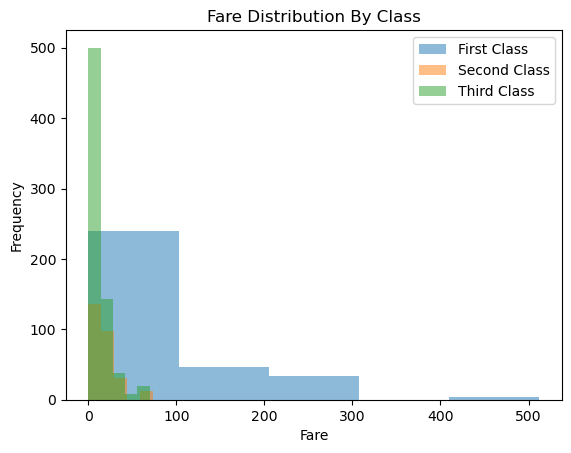

In [90]:
# Grouping data by class and plotting
class_labels = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'}
for class_val, data in df.groupby('Pclass')['Fare']:
    plt.hist(data, alpha=0.5, bins=5, label=class_labels[class_val])

plt.title("Fare Distribution By Class")
plt.xlabel('Fare')
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [24]:
# How does the fare distribution vary among differnt classes?
df.groupby('Pclass')['Fare'].sum()

Pclass
1    28265.4043
2     5866.6374
3     9418.4452
Name: Fare, dtype: float64

In [ ]:
#this above indicates that people in the first class paid more

In [91]:
# df['Family'] = df['SibSp'] + df['Parch']
df.shape[0]

1309

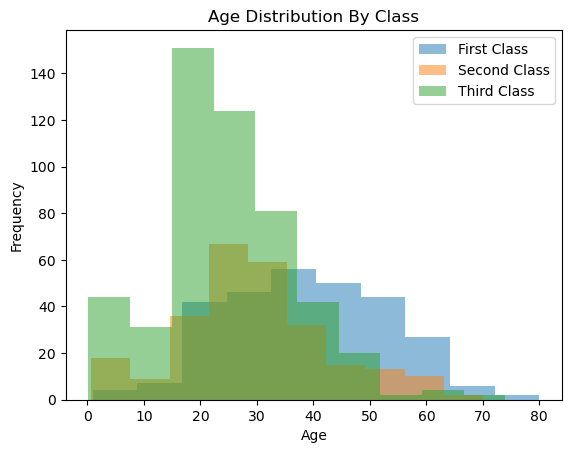

In [25]:
# How does the Age distribution differ between classes?

class_labels = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'}
for class_val, val in df.groupby('Pclass')['Age']:
    plt.hist(val, alpha=.5, label=class_labels[class_val])

plt.title("Age Distribution By Class")
plt.xlabel('Age')
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 4. FAMILY RELATIONSHIP

In [92]:
### Proportion of Passengers with Family:
df['Family'] = df['SibSp'] + df['Parch']
proportion_with_family = (df[df['Family'] > 0].shape[0] / df.shape[0]) * 100
print(f"Proportion of Passengers with Family: {proportion_with_family:.4f}%")

Proportion of Passengers with Family: 39.6486%


In [93]:
#### Survival Rate by Presence of Family:
# Does having family aboard impact survival rates?
# How does the Sutvival rate differ between passengers with and without family?

survival_with_family = df[df['Family'] > 0]['Survived'].mean() * 100
survival_without_family = df[df['Family'] == 0]['Survived'].mean() * 100
print(f"survival rate for people with family:     {survival_with_family:.2f}%")
print(f"survival rate for people without family:  {survival_without_family:.2f}%")

survival rate for people with family:     50.67%
survival rate for people without family:  29.24%


# 5. Embarkation Port

In [94]:

df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
#### Distribution of Passengers by Port from different embarkation ports
passengers_by_port = df['Embarked'].value_counts()
passengers_by_port


S    914
C    270
Q    123
Name: Embarked, dtype: int64

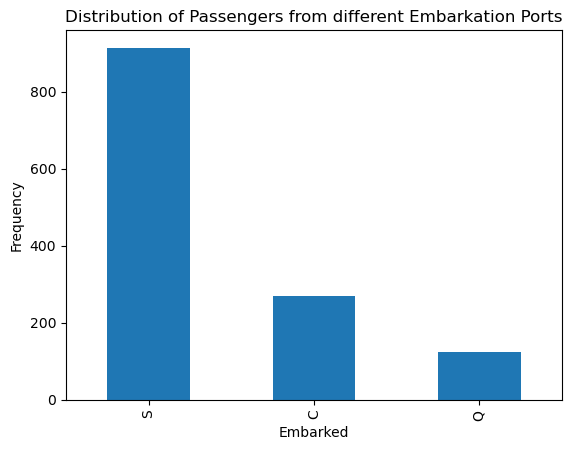

In [30]:
passengers_by_port.plot(kind ='bar')
plt.xlabel('Embarked')
plt.ylabel("Frequency")
plt.title("Distribution of Passengers from different Embarkation Ports");

In [32]:
#### Correlation between Port and Survival:

port_survival_correlation = df.groupby('Embarked')['Survived'].mean()
port_survival_correlation

Embarked
C    0.492593
Q    0.439024
S    0.333698
Name: Survived, dtype: float64

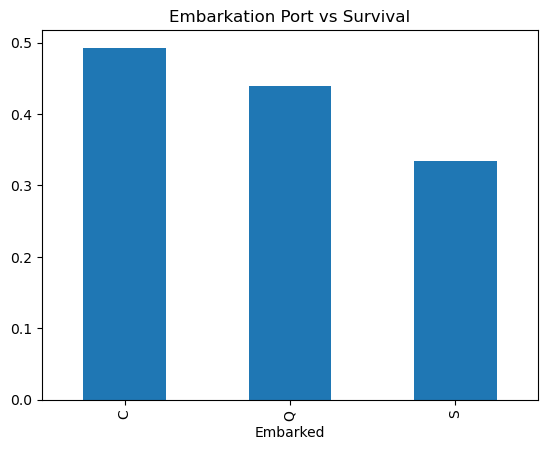

In [33]:
port_survival_correlation.plot(kind = 'bar')
plt.title("Embarkation Port vs Survival");

In [ ]:
# There is 0.492593 correlation between those that embarked at Cherbourg and survival
# There is 0.439024 correlation between those that embarked at Queenstown and survival
# There is 0.333698 correlation between those that embarked at Southampton and survival
# All the Embarkation ports have positive correlation with survival 

# EXPLORATORY DATA ANALYSIS


# 6. Cabin Class and Survival:
#### Survival Rate by Cabin Class:

survival_by_cabin_class = df.groupby('Pclass')['Survived'].mean() * 100
survival_by_cabin_class

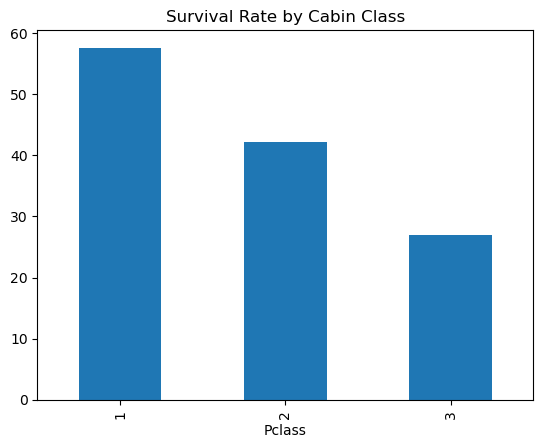

In [114]:
survival_by_cabin_class.plot(kind='bar')
plt.title("Survival Rate by Cabin Class");

#### Correlation between Cabin Location and Survival:

Assuming Cabin information is missing for a significant portion of data
Correlation might not be accurate without complete data

# 7. Name Analysis:

In [41]:

#### Extract Insights from Titles:

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_survival_correlation = df.groupby('Title')['Survived'].mean()
title_survival_correlation

Title
Capt        0.000000
Col         0.250000
Countess    1.000000
Don         0.000000
Dona        1.000000
Dr          0.375000
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.377049
Miss        0.788462
Mlle        1.000000
Mme         1.000000
Mr          0.107001
Mrs         0.868020
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [42]:
for dataset in df:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_gender_correlation = (df['Title'], df['Sex'])
title_gender_correlation

(0           Mr
 1          Mrs
 2         Miss
 3          Mrs
 4           Mr
          ...  
 1304        Mr
 1305      Dona
 1306        Mr
 1307        Mr
 1308    Master
 Name: Title, Length: 1309, dtype: object,
 0         male
 1       female
 2       female
 3       female
 4         male
          ...  
 1304      male
 1305    female
 1306      male
 1307      male
 1308      male
 Name: Sex, Length: 1309, dtype: object)

# 8. Missing Data:

In [43]:
#### Extent of Missing Data:
# How significant is the missing data in the columns?

missing_data = df.isnull().sum()
missing_data

Unnamed: 0        0
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

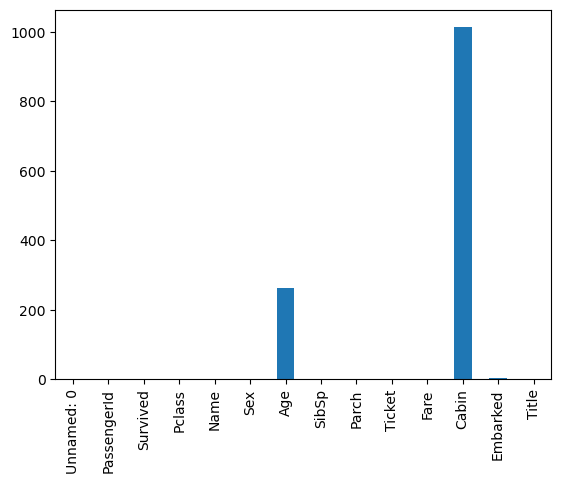

In [44]:
missing_data.plot(kind = 'bar');


In [45]:
#to see where we are missing data let use seaborn to create too

<Axes: >

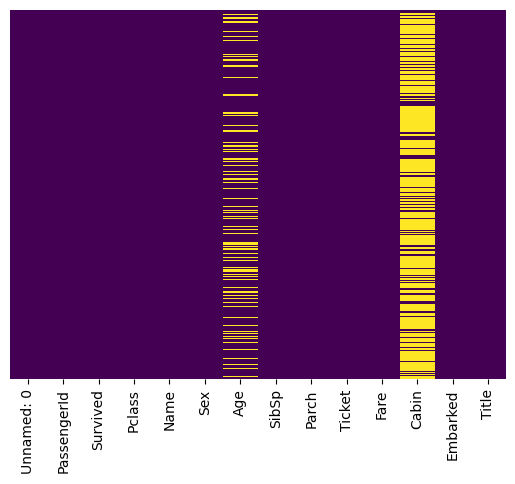

In [46]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Handling Missing Data:
- For Age: Imputation using mean/median age or predictive models.
- For Cabin: Consider dropping this feature due to high missingness or use it as a categorical variable (e.g., presence/absence).
- For Embarked: Imputation with the mode value or other meaningful approaches.



In [47]:
df.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [48]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [49]:
# df['Title'].value_counts()


#  FEATURE CORRELATION

In [55]:
# Is there any correlation betweeen survival and age or family relationships?

df['Family']=df['SibSp']+df['Parch']
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1305,414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
1306,415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


Text(0.5, 1.0, 'Features Correlation Heatmap')

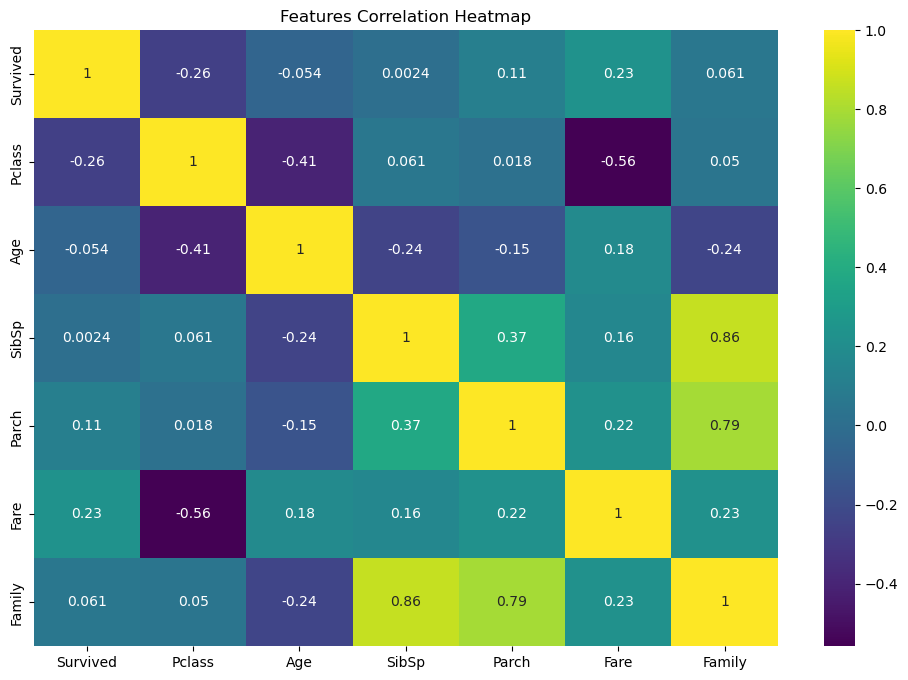

In [56]:
# Are there strong correlations b/w different features?

import seaborn as sns
plt.figure(figsize = (12,8))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'Family']].corr(), annot = True, cmap = 'viridis')
plt.title('Features Correlation Heatmap')

In [37]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [57]:
#### Strongest Correlations with Survival:
# Which features are strongly correlated with survival and how significant are the correlations?

strongest_survival_correlations = df[['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'Family']].corr()['Survived'].sort_values(ascending=False)
strongest_survival_correlations

Survived    1.000000
Fare        0.233622
Parch       0.108919
Family      0.061090
SibSp       0.002370
Age        -0.053695
Pclass     -0.264710
Name: Survived, dtype: float64

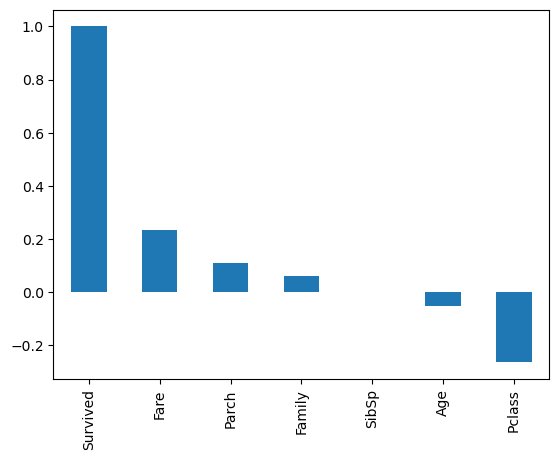

In [73]:
strongest_survival_correlations.plot(kind = "bar");

In [ ]:
 # Fare has a strong positive correlation (0.233622) with Survival
# Pclass has a strong negative correlation (0.264710) with Survival
